<a href="https://colab.research.google.com/github/renya1993/Learning/blob/main/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E3%82%B3%E3%83%B3%E3%83%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

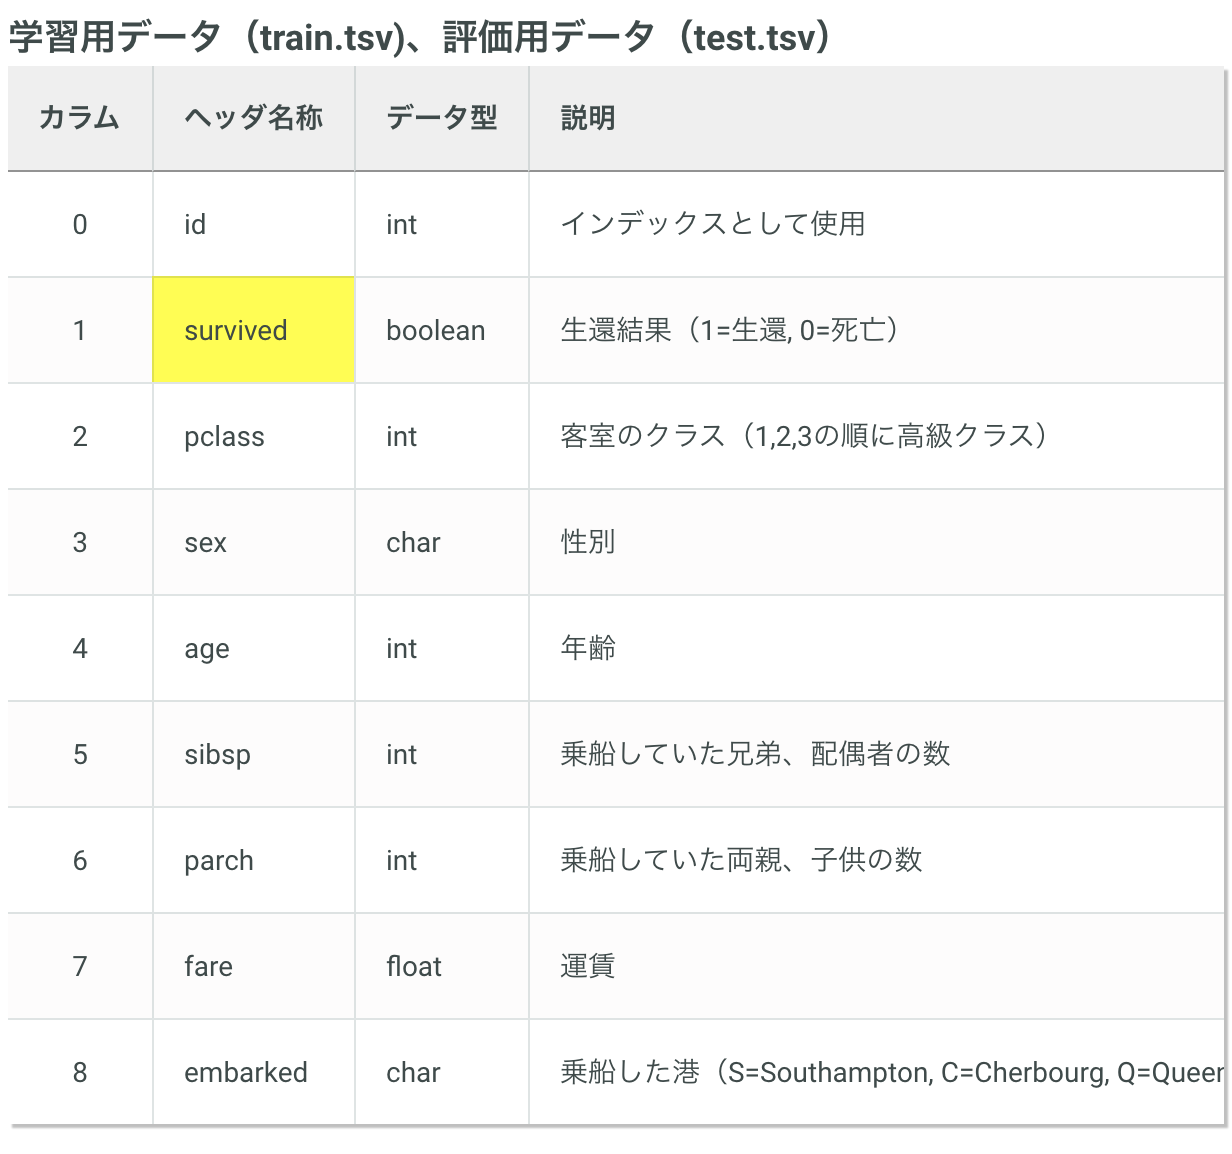

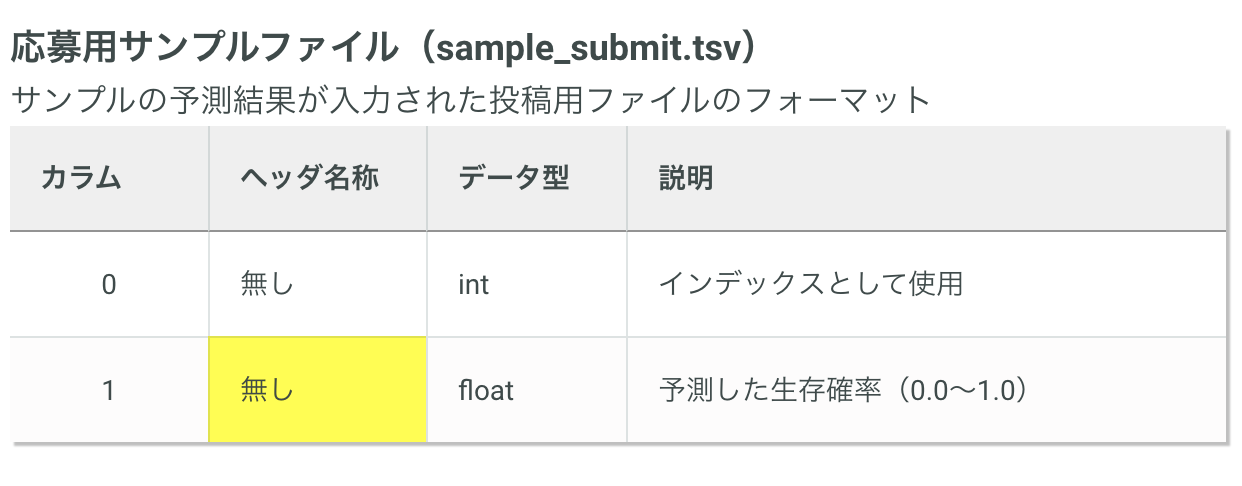

In [299]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers

In [300]:
import pandas as pd

test = pd.read_csv("/content/drive/MyDrive/competition/titanic_signate/test.tsv",sep='\t',index_col= 0)
train =pd.read_csv("/content/drive/MyDrive/competition/titanic_signate/train.tsv",sep='\t',index_col= 0)
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S


##欠損値ageに機械学習で値を入れる

In [301]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
873,0,3,male,47.0,0,0,9.0000,S
874,1,2,female,28.0,1,0,24.0000,C
879,1,1,female,56.0,0,1,83.1583,C


In [302]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


In [303]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 3 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    int64  
 1   pclass    445 non-null    int64  
 2   sex       445 non-null    object 
 3   age       360 non-null    float64
 4   sibsp     445 non-null    int64  
 5   parch     445 non-null    int64  
 6   fare      445 non-null    float64
 7   embarked  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


## オブジェクト型をfloatに変更

In [304]:
df = pd.get_dummies(train)
df.corr()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.358097,-0.081394,-0.045087,0.079669,0.258605,0.559465,-0.559465,0.182568,0.005062,-0.172769
pclass,-0.358097,1.000000,-0.300686,0.069857,-0.015726,-0.549651,-0.193761,0.193761,-0.207779,0.252136,0.034011
age,-0.081394,-0.300686,1.000000,-0.283126,-0.153382,0.098488,-0.072899,0.072899,0.004219,-0.018107,-0.015860
sibsp,-0.045087,0.069857,-0.283126,1.000000,0.423522,0.164773,0.097883,-0.097883,-0.074573,-0.095163,0.129479
parch,0.079669,-0.015726,-0.153382,0.423522,1.000000,0.241855,0.220046,-0.220046,-0.014436,-0.129345,0.099990
fare,0.258605,-0.549651,0.098488,0.164773,0.241855,1.000000,0.168935,-0.168935,0.219983,-0.146377,-0.105108
sex_female,0.559465,-0.193761,-0.072899,0.097883,0.220046,0.168935,1.000000,-1.000000,0.102369,0.055430,-0.137247
sex_male,-0.559465,0.193761,0.072899,-0.097883,-0.220046,-0.168935,-1.000000,1.000000,-0.102369,-0.055430,0.137247
embarked_C,0.182568,-0.207779,0.004219,-0.074573,-0.014436,0.219983,0.102369,-0.102369,1.000000,-0.143993,-0.764582
embarked_Q,0.005062,0.252136,-0.018107,-0.095163,-0.129345,-0.146377,0.055430,-0.055430,-0.143993,1.000000,-0.510059


fareと、sex、pclassが影響してそう

１つ１つ調べてみる
### embarkedで調べる

In [305]:
print("生存した人の数_embarked調べ")
print("embarked_C",df[df["survived"]==1][df["embarked_C"]==1].shape)
print("embarked_Q",df[df["survived"]==1][df["embarked_Q"]==1].shape)
print("embarked_S",df[df["survived"]==1][df["embarked_S"]==1].shape)

生存した人の数_embarked調べ
embarked_C (47, 11)
embarked_Q (16, 11)
embarked_S (114, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


これを見る限り、embarkedは関係ありそう

### sexで調べる

In [306]:
print("生存した人の数_sex調べ")
print("sex_female",df[df["survived"]==1][df["sex_female"]==1].shape)
print("sex_male",df[df["survived"]==1][df["sex_male"]==1].shape)

生存した人の数_sex調べ
sex_female (121, 11)
sex_male (58, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


これも関係ありそう

### fareで調べる

In [307]:
print("詳細情報")
df["fare"].describe()

詳細情報


count    445.000000
mean      33.959971
std       52.079492
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: fare, dtype: float64

In [308]:
print("生存した人の数_fare調べ")
print("sex_female",df[df["survived"]==1][df["fare"]>=33.959971].shape)
print("sex_female",df[df["survived"]==0][df["fare"]>=33.959971].shape)
print("sex_female",df[df["survived"]==1][df["fare"]<33.959971].shape)
print("sex_female",df[df["survived"]==0][df["fare"]<33.959971].shape)

生存した人の数_fare調べ
sex_female (69, 11)
sex_female (42, 11)
sex_female (110, 11)
sex_female (224, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


平均より多い方が生き残ってる率高い

###pclassで調べる

In [309]:
print("---------生存------------")
print("sex_female",df[df["survived"]==1][df["pclass"]==1].shape)
print("sex_female",df[df["survived"]==1][df["pclass"]==2].shape)
print("sex_female",df[df["survived"]==1][df["pclass"]==3].shape)

print("---------死亡------------")
print("sex_female",df[df["survived"]==0][df["pclass"]==1].shape)
print("sex_female",df[df["survived"]==0][df["pclass"]==2].shape)
print("sex_female",df[df["survived"]==0][df["pclass"]==3].shape)

---------生存------------
sex_female (74, 11)
sex_female (43, 11)
sex_female (62, 11)
---------死亡------------
sex_female (34, 11)
sex_female (54, 11)
sex_female (178, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '_

pclassの1と3だけめっちゃ関係ありそう。
分ける必要あり

In [310]:
df["pclass_1"] = df[df["pclass"]==1]["pclass"]
df["pclass_1"] =df["pclass_1"].fillna(0.0)

In [311]:
#割り算して、1と0に分けてる
df["pclass_2"] = df[df["pclass"]==2]["pclass"]/2
df["pclass_2"] =df["pclass_2"].fillna(0.0)

In [312]:
df["pclass_3"] = df[df["pclass"]==3]["pclass"]/3
df["pclass_3"] =df["pclass_3"].fillna(0.0)

In [313]:
df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
id,,,,,,,,,,,,,,
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,1.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0
7,0,3,2.0,3,1,21.0750,0,1,0,0,1,0.0,0.0,1.0
9,1,2,14.0,1,0,30.0708,1,0,1,0,0,0.0,1.0,0.0
11,1,1,58.0,0,0,26.5500,1,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0,3,47.0,0,0,9.0000,0,1,0,0,1,0.0,0.0,1.0
874,1,2,28.0,1,0,24.0000,1,0,1,0,0,0.0,1.0,0.0
879,1,1,56.0,0,1,83.1583,1,0,1,0,0,1.0,0.0,0.0


#機械学習で欠損値ageを代入

In [314]:
train_lost_age =df.loc[df[df["age"].isnull()].index,:]
train_lost_age = train_lost_age.drop(columns="age")

train_have_age =df.loc[df[df["age"].isnull()==False].index,:]
train_have_age
train_lost_age

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
id,,,,,,,,,,,,,
19,1,3,0,0,7.2250,1,0,1,0,0,0.0,0.0,1.0
26,0,3,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
28,1,3,0,0,7.8792,1,0,0,1,0,0.0,0.0,1.0
29,0,3,0,0,7.8958,0,1,0,0,1,0.0,0.0,1.0
32,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,8,2,69.5500,0,1,0,0,1,0.0,0.0,1.0
849,1,1,1,0,89.1042,1,0,1,0,0,1.0,0.0,0.0
863,0,3,8,2,69.5500,1,0,0,0,1,0.0,0.0,1.0


In [315]:
#ageをdrop、これが調べるデータとなる
train_lost_age_train = train_lost_age
train_lost_age_train

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
id,,,,,,,,,,,,,
19,1,3,0,0,7.2250,1,0,1,0,0,0.0,0.0,1.0
26,0,3,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
28,1,3,0,0,7.8792,1,0,0,1,0,0.0,0.0,1.0
29,0,3,0,0,7.8958,0,1,0,0,1,0.0,0.0,1.0
32,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,8,2,69.5500,0,1,0,0,1,0.0,0.0,1.0
849,1,1,1,0,89.1042,1,0,1,0,0,1.0,0.0,0.0
863,0,3,8,2,69.5500,1,0,0,0,1,0.0,0.0,1.0


In [316]:
train_have_age_train = train_have_age.drop(columns="age")
train_have_age_test = train_have_age["age"]
train_have_age_train

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
id,,,,,,,,,,,,,
3,1,1,1,0,53.1000,1,0,0,0,1,1.0,0.0,0.0
4,0,3,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0
7,0,3,3,1,21.0750,0,1,0,0,1,0.0,0.0,1.0
9,1,2,1,0,30.0708,1,0,1,0,0,0.0,1.0,0.0
11,1,1,0,0,26.5500,1,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0,1,0,0,5.0000,0,1,0,0,1,1.0,0.0,0.0
873,0,3,0,0,9.0000,0,1,0,0,1,0.0,0.0,1.0
874,1,2,1,0,24.0000,1,0,1,0,0,0.0,1.0,0.0


In [317]:
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test = train_test_split(train_have_age_train,train_have_age_test,test_size=0.2)

In [318]:
from sklearn.linear_model import LinearRegression as LR
lr=LR()

In [319]:
lr.fit(x_train,t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [320]:
from sklearn.metrics import mean_squared_error as MSE
pre_x_test = lr.predict(x_test) 
mse_test= MSE(t_test,pre_x_test)
rmse_test=np.sqrt(mse_test)
rmse_test

12.471510532676483

In [321]:
##次にモデルがうまく学習できているかを調べます。そのためには、学習データと、評価データ
#を比較する必要があります。
pre_x_train = lr.predict(x_train) 
mse_train =  MSE(t_train,pre_x_train)
rmse_train=np.sqrt(mse_train)

print("rmse_train",rmse_train)
print("rmse_test",rmse_test)
##trainの方が精度がいいことがわかります。

rmse_train 12.444303986369903
rmse_test 12.471510532676483


In [322]:
pre_lost_test = lr.predict(train_lost_age) 
pre_lost_test.reshape(-1,1).shape
#出力完了

(85, 1)

In [323]:
pre_lost_test_data =pd.DataFrame(pre_lost_test.reshape(-1))
pre_lost_test_data

,0
0,21.484792
1,28.282041
2,26.419447
3,29.579372
4,26.420701
...,...
80,-3.098127
81,30.412418
82,-4.384061
83,29.563803


In [324]:
pre_lost_test_data[0].values.shape

(85,)

In [325]:
#これを、データに入れ込む。
df.loc[df[df["age"].isnull()].index,"age"] = pre_lost_test_data[0].values


In [326]:
df["age"].isnull()

id
3      False
4      False
7      False
9      False
11     False
       ...  
873    False
874    False
879    False
884    False
888    False
Name: age, Length: 445, dtype: bool

In [327]:
df.loc[df[df["age"].isnull()].index,:]["age"]

Series([], Name: age, dtype: float64)

#どのカラムを選ぶかの選択

In [328]:
train = df.drop(columns="survived")

In [329]:
train_output = df["survived"]

## 訓練データの分割

In [330]:
from sklearn.model_selection import train_test_split

x_train,x_test,t_train,t_test = train_test_split(train,train_output,test_size=0.1)

In [331]:
x_train

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
id,,,,,,,,,,,,,
610,3,39.000000,1,5,31.2750,1,0,0,0,1,0.0,0.0,1.0
664,3,20.000000,1,0,7.9250,0,1,0,0,1,0.0,0.0,1.0
291,1,19.000000,1,0,91.0792,1,0,1,0,0,1.0,0.0,0.0
777,3,5.000000,0,0,12.4750,1,0,0,0,1,0.0,0.0,1.0
348,3,3.000000,1,1,15.9000,0,1,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2,54.000000,0,0,26.0000,0,1,0,0,1,0.0,1.0,0.0
759,1,33.000000,0,0,86.5000,1,0,0,0,1,1.0,0.0,0.0
19,3,21.484792,0,0,7.2250,1,0,1,0,0,0.0,0.0,1.0


In [332]:
x_train=x_train.values.reshape(-1,train.shape[1])
t_train=t_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,train.shape[1])
t_test=t_test.values.reshape(-1,1)

In [333]:
x_train.shape
t_train.shape

(400, 1)

##pytorchで実装

#モデルの設定

In [334]:
class MLP(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super().__init__()
    self.l1 =nn.Linear(input_dim,hidden_dim)
    self.a1 =nn.Sigmoid()
    self.l2 =nn.Linear(hidden_dim,output_dim)
    self.a2 = nn.Sigmoid()

    self.layers = [self.l1,self.a1,self.l2,self.a2]

  def forward(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

In [335]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [336]:
train.shape[1]

13

In [337]:
model = MLP(train.shape[1],20,1).to(device)

#損失関数、微分のやり方の設定

In [338]:
criterion = nn.BCELoss()

def compute_loss(t,y):
  return criterion(y,t)

optimizer = optimizers.SGD(model.parameters(),lr=0.05)

##訓練を司るもの

#学習

In [339]:
import matplotlib.pyplot as plt

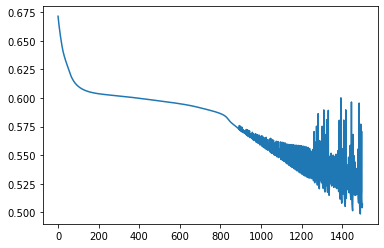

In [340]:
def train_step(x,t):
  model.train()
  preds = model(x)
  loss = compute_loss(t,preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return loss

epochs = 1500
f= []
r= []
for epoch in range(epochs):
  
  train_loss =0
  x_ = torch.Tensor(x_train).to(device)
  t_ = torch.Tensor(t_train).to(device)
  x_t = torch.Tensor(x_test).to(device)
  t_t = torch.Tensor(t_test).to(device)
  loss = train_step(x_,t_).data.cpu().numpy()
  #loss2 = train_step(x_t,t_t).data.cpu().numpy()
  f.append(loss)
  #r.append(loss2)
  now_epoch=epoch
"""
  if epoch>300:
    if f[epoch-1]<f[epoch]+f[epoch]/20 and r[epoch-1]<r[epoch]+r[epoch]/20 :
      print(f[epoch])
      break

"""
plt.plot(np.arange(0,now_epoch+1,1),f)
#plt.plot(np.arange(0,now_epoch+1,1),r)

In [341]:
def test_step(x,t):
  x = torch.Tensor(x).to(device)
  t = torch.Tensor(t).to(device)
  model.eval()
  preds =model(x)
  loss = compute_loss(t,preds)
  return loss,preds

loss,preds = test_step(x_test,t_test)
loss2,preds2 = test_step(x_train,t_train)

test_loss = loss.item()
train_loss = loss2.item()
preds = preds.data.cpu().numpy() >0.5
preds2 = preds2.data.cpu().numpy() >0.5

test_acc = accuracy_score(t_test,preds)
test_acc_train = accuracy_score(t_train,preds2)

print(test_loss,test_acc)
print(train_loss,test_acc_train)


0.4609837532043457 0.7555555555555555
0.5156822800636292 0.7525
